## *Testing Regression Models and their Metrics*
Sources used in this project:

- `Dataset` - [Vehicle dataset](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho)

- All `metrics` and `formulas` are come from ISLP book - [An Introduction to Statistical Learning with Python](https://anthology-of-data.science/resources/james2023islp.pdf)


This notebook focuses on **building, evaluating, and comparing different regression models** using the cleaned data. The goal is to identify the most accurate modeling approach for predicting vehicle prices.

**Key Actions:**

* **Data Standardization:** All independent variables are standardized using the Z-score method. This scales the data to a common range, which helps optimize the performance of the regression algorithms.
* **Model Implementation:** Three distinct regression models are built and tested:
    1.  A baseline **Linear Regression** model.
    2.  A **Linear Regression** model using a **logarithmic transformation** on the target variable.
    3.  A **Polynomial Regression** model to capture potential non-linear relationships between the features and the price.
* **Model Evaluation and Comparison:** Each model is systematically evaluated using statistical metrics, including **R-squared**, **F-Test**, and **Root Mean Squared Error (RMSE)**. The results are compiled into a final table to provide a clear comparison of their predictive power.


In [172]:
from google.colab import drive, files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')


In [173]:
#drive.mount('/content/drive')

In [174]:
path = "/content/drive/MyDrive/Vehicle_prices/vehicle_prices.csv"
df = pd.read_csv(path)

In [175]:
df = df.copy()

##Exploratory Data Analysis

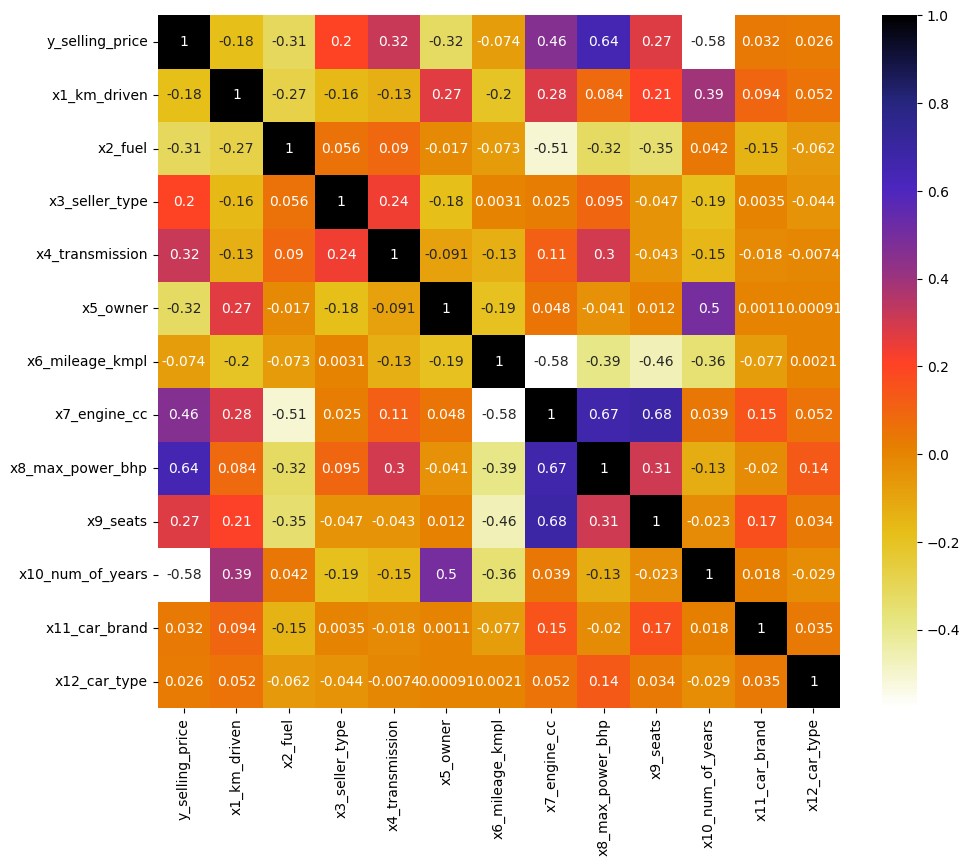

In [176]:
corr=df.drop(columns=["name"]).corr()
plt.figure(figsize=(11, 9))
sns.heatmap(
    corr,
    cmap='CMRmap_r',
    annot=True,

);

In [177]:
corr.y_selling_price.apply(np.abs).sort_values(ascending=False)

,y_selling_price
y_selling_price,1.000000
x8_max_power_bhp,0.644819
x10_num_of_years,0.577942
x7_engine_cc,0.458991
x5_owner,0.321398
x4_transmission,0.315929
x2_fuel,0.310846
x9_seats,0.272109
x3_seller_type,0.199445
x1_km_driven,0.182058


###data Standardization
$$Z_{i} = \frac{x_i - μ}{σ}$$ $i \in {1, 2, ...,  n}$


where $n$ is a number of rows in $X$


In [178]:
x_cols = df.columns.drop(["name", "y_selling_price"])
x_cols = list(x_cols)

X = df[x_cols]
y = df['y_selling_price']

In [179]:
for i in range(X.shape[1]):
  col = x_cols[i]
  X[col] = (X[col] - X[col].mean()) / X[col].std()
X.head()

,x1_km_driven,x2_fuel,x3_seller_type,x4_transmission,x5_owner,x6_mileage_kmpl,x7_engine_cc,x8_max_power_bhp,x9_seats,x10_num_of_years,x11_car_brand,x12_car_type
0,1.291087,-0.899800,-0.376529,-0.305624,-0.662253,0.972837,-0.350963,-0.443764,-0.433522,-0.097368,0.267460,0.834038
1,0.843142,-0.899800,-0.376529,-0.305624,0.711513,0.403671,0.181374,0.619694,-0.433522,-0.097368,1.249592,0.429449
2,1.194471,0.943955,-0.376529,-0.305624,2.085278,-0.462671,0.179245,-0.299664,-0.433522,1.883970,-1.135587,-1.111103
3,0.966108,-0.899800,-0.376529,-0.305624,-0.662253,0.872100,-0.035819,0.132636,-0.433522,0.893301,-0.995282,1.534289
4,0.843142,0.943955,-0.376529,-0.305624,-0.662253,-0.865620,-0.244496,0.067791,-0.433522,1.636303,0.267460,0.834038


In [180]:
y.head()

,y_selling_price
0,450000.0
1,370000.0
2,158000.0
3,225000.0
4,130000.0


##Building and Evaluating the Linear Regression Model
Linear Regression model formula:
$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p + \epsilon$$
where:
- $p$  -  a number of columns in $X$
- $\beta_p$ -  a regression coeficient
- $\beta_0$ -  an intercept term
- $\epsilon$ -  a random error term

In [181]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=int(0.3*(X.shape[0])), random_state=77)

In [182]:
lr = LinearRegression()
lr.fit(X_train, y_train);


In [183]:
lr.intercept_

np.float64(482795.04944851424)

In [184]:
lr.rank_, X.shape[1]
# all columns are independent

(12, 12)

In [185]:
y_pred = lr.predict(X_test)

## Model Evaluation

###to evaluate model's performance we use:
#### $R^2$ - a measure of the fit (variability) of the model

Value of $R^2$ always falls between 0 and 1 ($R^2 \in [0, 1]$),

where $R^2$ close to 1 inform that large proportion of the variability is explained by the regression

$$ R^2 = 1 - \frac{RSS}{TSS}$$
where:

* $RSS$ = $\sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}$,    $\hat{y}$ - `y_pred`

* $TSS$ = $\sum_{i=1}^{n} (y_{i} - \overline{y})^{2}$,
$\overline{y} $ - `y_mean`


#### $F$-Test- assesses the overall significance of a regression model. It checks if at least one predictor is useful in predicting the response.

* **Null Hypothesis ($H_0$)**: All regression coefficients are equal to zero ($\beta_1 = \beta_2 = \dots = \beta_p = 0$). The model has no predictive power.
* **Alternative Hypothesis ($H_1$)**: At least one coefficient is non-zero. The model is useful.

$$F = \frac{(TSS - RSS) / p}{RSS / (n - p - 1)}$$

* `p`: number of columns
* `n`: number of raws

A large $F$-statistic allow us to reject $H_0$, which means the model is statistically significant.


#### Root Mean Squared Error (RMSE) -  measures the square root of the average of the squared differences between the actual and predicted values. It represents the standard deviation of the residuals (prediction errors).

$$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^{2}} =
\sqrt{\frac{RSS}{n}}$$

* A lower RMSE value indicates a better model fit. An RMSE of 0 represents a perfect fit.
* Because the errors are squared before being averaged, RMSE gives higher weight to larger errors, making it sensitive to outliers.


In [186]:
def to_plot(y_test, y_pred, deg:int=1):
  y_eval = pd.DataFrame({
      "y_test": y_test,
      "y_pred": y_pred
  }
  )
  plt.figure(figsize=(8, 5))
  plt.grid(True)
  sns.regplot(
    x='y_test',
    y='y_pred',
    order = deg,
    data=y_eval,
    line_kws={'color': 'red'}
    );


In [187]:
def model_eval(y_pred:np.array, y_test:np.array, X_test:np.array, deg:int=0):
    rss = ((y_test - y_pred)**2).sum()
    tss = ((y_test - y_test.mean())**2).sum()

    R_squared = 1 - (rss/(X_test.shape[0] - deg - 1))* ((X_test.shape[0] - 1)/tss)

    F_test = ((tss - rss) / X_test.shape[1]) / (rss / (X_test.shape[0] - X_test.shape[1] - 1))

    rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))

    return pd.DataFrame({"R_squared": [R_squared], "F_test": [F_test] , "rmse" : [rmse]})

In [188]:
results_1 = model_eval(y_pred, y_test, X_test, deg=0)
results_1

,R_squared,F_test,rmse
0,0.704747,458.289046,173173.754569


## Visualizing Model Results

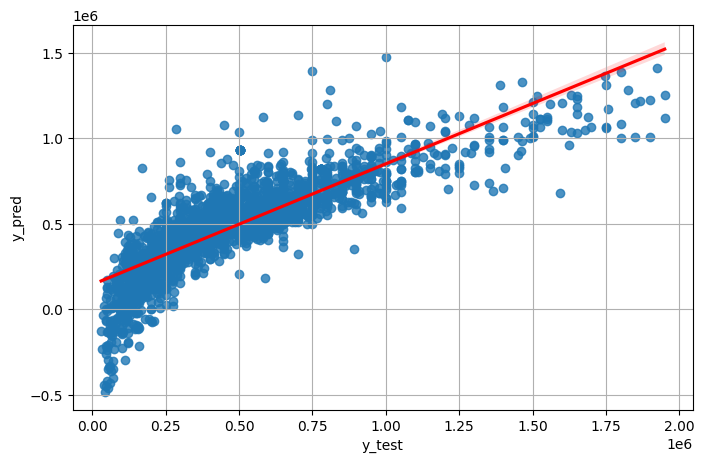

In [189]:
to_plot(y_test, y_pred)

## Logarithmic Transformation
The data suggests a logarithmic relationship. Let's check how the model behaves after applying a log transformation to the dependent variable $y$.

In [190]:
y_log = np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=int(0.3*(X.shape[0])), random_state=66)

lr = LinearRegression()
lr.fit(X_train, y_train);

y_pred =lr.predict(X_test)
y_pred = np.expm1(y_pred)

y_test = y.loc[y_test.index]

results_2 = model_eval(y_pred, y_test, X_test)
results_2

,R_squared,F_test,rmse
0,0.78125,685.714603,146009.668084


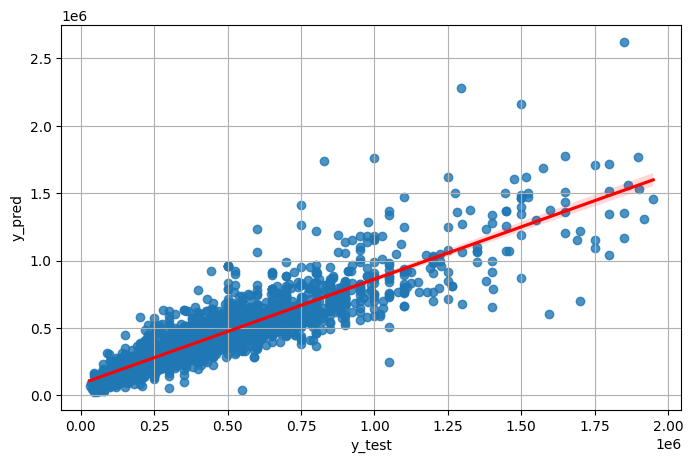

In [191]:
to_plot(y_test, y_pred)

In [192]:
results = pd.concat([results_1.T, results_2.T], axis=1)
results.columns = ["1_approach", "2_approach"]
results

,1_approach,2_approach
R_squared,0.704747,0.781250
F_test,458.289046,685.714603
rmse,173173.754569,146009.668084


### Summary of `Linearn Regression` approach:
The log transformation `2_approach` significantly improved the model's performance. The **R-squared** value increased from 0.70 to almost 0.80, and the **RMSE** decreased from 173174 to 146009. These changes, along with a higher **F-test**, indicate the transformed model provides a better fit and more accurate predictions.

## Polynomial Regression
$$
Y = \beta_0 + \beta_1X + \beta_2X^2 + \dots + \beta_dX^d + \epsilon
$$
* `d` - degree of polynomial

In [193]:
def best_degree(X, y, d_max:int, rand_state=44):
  d = range(1, d_max+1)
  global y_test, X_test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=int(0.3*(X.shape[0])), random_state=rand_state)

  degs = []
  y_pred_list = []
  rmse_list = []
  for deg in d:

    degs.append(deg)
    poly_transform = PolynomialFeatures(degree=deg, include_bias=False)
    X_poly_train = poly_transform.fit_transform(X_train)

    lr_poly = LinearRegression()
    lr_poly.fit(X_poly_train, y_train);
    X_poly_test = poly_transform.transform(X_test)
    y_pred = lr_poly.predict(X_poly_test)

    y_pred_list.append(y_pred)
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
  results = pd.DataFrame({
        'degree': degs,
        'rmse': rmse_list,
        "y_pred" : y_pred_list,

    })
  return results.loc[results.rmse == results.rmse.min(), :]

In [194]:
best_deg = best_degree(X, y, d_max=4)
best_deg

,degree,rmse,y_pred
1,2,140013.226356,"[261185.98079588675, 278882.2180004923, 556736..."


In [195]:
y_pred = best_deg.y_pred.to_numpy()[0]

In [196]:
results_3 = model_eval(y_pred, y_test, X_test, deg=2)
results_3

,R_squared,F_test,rmse
0,0.808238,810.107511,140013.226356


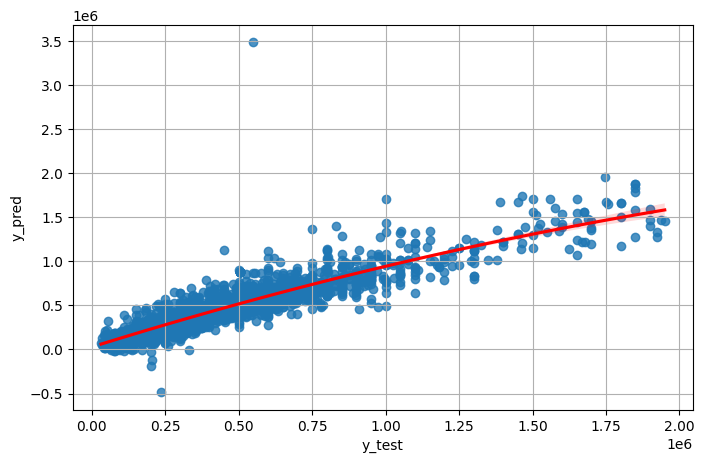

In [197]:
to_plot(y_test, y_pred, deg = 2);

In [198]:
results = pd.concat([results_1.T, results_2.T, results_3.T], axis=1)
results.columns = ["1_approach", "2_approach", "3_approach"]
results

,1_approach,2_approach,3_approach
R_squared,0.704747,0.781250,0.808238
F_test,458.289046,685.714603,810.107511
rmse,173173.754569,146009.668084,140013.226356



### Summary

Based on the results, the **Polynomial Regression model (3rd approach)** demonstrated the best performance, achieving the highest **R-squared value of 0.81** and the lowest **RMSE of 140,013**. This indicates that incorporating non-linear features significantly improved the model's performance. However, the error is still significan, what suggests that linear algorithms are not accurate enough for this particular problem.